In [61]:
""" This notebook is prepared for data preprocessing in Ubaar Competittion at kaggle.com website.  """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits


In [62]:
data=pd.read_csv("train.csv")

In [63]:
data.head()

,ID,date,sourceLatitude,sourceLongitude,SourceState,destinationLatitude,destinationLongitude,destinationState,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight,price
0,88142929797,960218,36.666045,48.489706,زنجان,29.600574,52.537114,فارس,1092.0,751.0,treili,kafi,20.00,15300000
1,30842979862,960511,32.323951,50.855412,چهارمحال و بختیاری,34.644923,50.876092,قم,414.0,264.0,khavar,mosaghaf_felezi,2.50,1800000
2,54262798716,960602,32.575448,51.581011,اصفهان,31.819508,49.865235,خوزستان,310.0,292.0,joft,kompressi,14.97,3742000
3,64071173752,960319,35.029685,48.085763,کردستان,35.703801,51.398824,تهران,391.0,271.0,khavar,mosaghaf_felezi,2.50,1300000
4,68088966447,960609,31.586965,54.449607,یزد,36.730367,53.965480,گلستان,756.0,573.0,joft,bari,15.00,8870000


In [64]:
data.isnull().any()
data = data[np.isfinite(data['taxiDurationMin'])]
data.isnull().any()


ID                      False
date                    False
sourceLatitude          False
sourceLongitude         False
SourceState             False
destinationLatitude     False
destinationLongitude    False
destinationState        False
distanceKM              False
taxiDurationMin         False
vehicleType             False
vehicleOption           False
weight                  False
price                   False
dtype: bool

In [65]:
data.describe()

,ID,date,sourceLatitude,sourceLongitude,destinationLatitude,destinationLongitude,distanceKM,taxiDurationMin,weight,price
count,4.999700e+04,49997.000000,49997.000000,49997.000000,49997.000000,49997.000000,49997.000000,49997.000000,49997.000000,4.999700e+04
mean,5.494536e+10,960380.060304,34.198351,51.800405,34.061448,52.077692,563.006420,400.907594,10.077076,5.712882e+06
std,2.596179e+10,163.794120,2.900762,3.673577,2.989674,3.926024,398.557907,265.046801,7.721335,4.715626e+06
min,1.000002e+10,960101.000000,25.132385,44.380853,25.139889,44.147948,0.000000,0.000000,0.500000,5.000000e+05
25%,3.236436e+10,960223.000000,32.373560,49.587127,31.894019,49.688200,244.000000,190.000000,3.000000,2.500000e+06
50%,5.507345e+10,960404.000000,35.245987,51.402037,35.483428,51.404919,489.000000,355.000000,10.000000,4.307000e+06
75%,7.732170e+10,960519.000000,36.290719,53.359376,36.283635,54.068292,820.000000,581.000000,15.000000,7.400000e+06
max,9.999732e+10,960631.000000,39.652819,62.345903,39.653143,62.951479,2493.000000,1621.000000,25.000000,4.755000e+07


In [66]:
data['taxiDurationMin'].value_counts().plot(kind='bar')
plt.title('taxiDuration')
plt.xlabel('taxiDuration')
plt.ylabel('Count')
sns.despine
plt.show

<function matplotlib.pyplot.show>

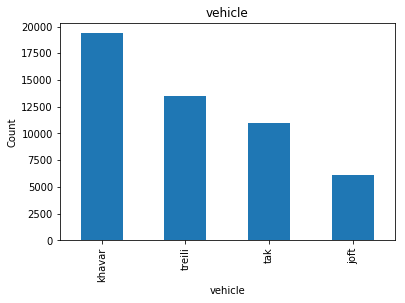

In [67]:
""" khavar is the most of vehicle used in this process """
data['vehicleType'].value_counts().plot(kind='bar')
plt.title('vehicle')
plt.xlabel('vehicle')
plt.ylabel('Count')
sns.despine
plt.show()

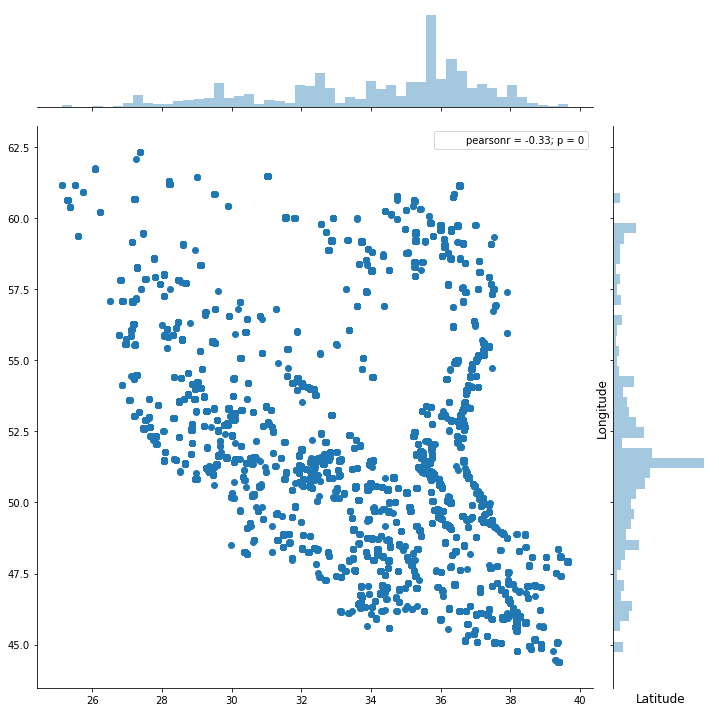

TypeError: 'module' object is not callable

In [68]:
"""    we will see that most of source of region is below of iran country! """

plt.figure(figsize=(10,10))
sns.jointplot(x=data.sourceLatitude.values, y=data.sourceLongitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

In [ ]:
""" It's about region of destination. most of them is located bottom of iran country!! """
plt.figure(figsize=(10,10))
sns.jointplot(x=data.destinationLatitude.values, y=data.destinationLongitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

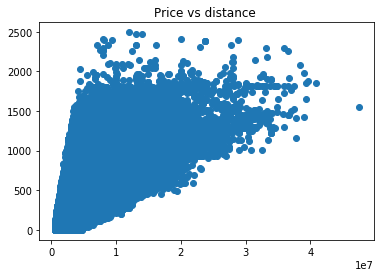

In [69]:
""" we found that strong relation between distance and price variable,
but more price is not affected rather than longer distance directly. """
plt.scatter(data.price,data.distanceKM)
plt.title("Price vs distance ")
plt.show()

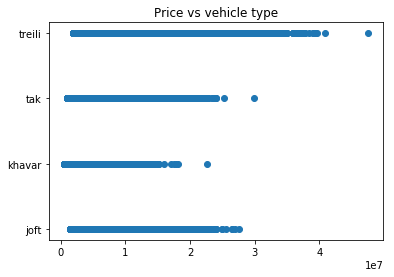

In [70]:
""" we found from this scatter plot that treili is used for longer distance. """
plt.scatter(data.price,data.vehicleType)
plt.title("Price vs vehicle type")
plt.show()

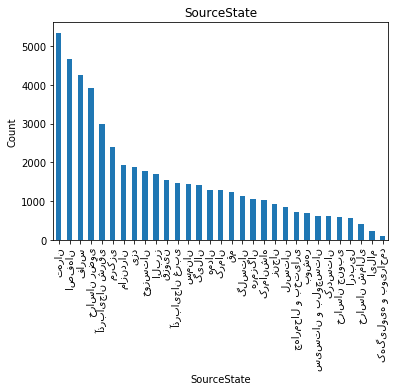

In [71]:
""" Tehran is the valuable city because of the most source region to transfer load"""
data['SourceState'].value_counts().plot(kind='bar')
plt.title('SourceState')
plt.xlabel('SourceState')
plt.ylabel('Count')
sns.despine
plt.show()

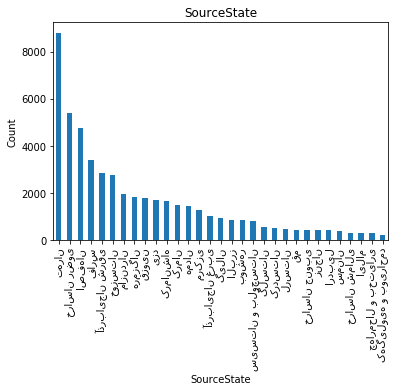

In [72]:
""" Also Tehran is the most destination region to transfer load."""

data['destinationState'].value_counts().plot(kind='bar')
plt.title('SourceState')
plt.xlabel('SourceState')
plt.ylabel('Count')
sns.despine
plt.show()

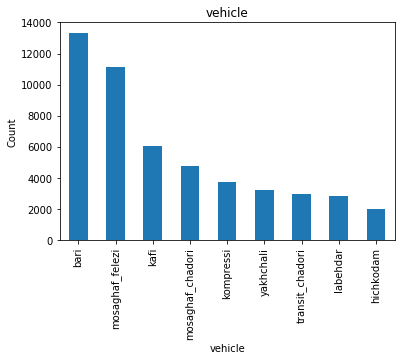

In [73]:
""" plot vehicle Option in this process """
data['vehicleOption'].value_counts().plot(kind='bar')
plt.title('vehicle')
plt.xlabel('vehicle')
plt.ylabel('Count')
sns.despine
plt.show()

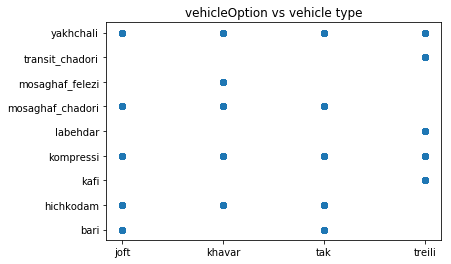

In [74]:
""" relationship between vehicleType and vehicleOption """
plt.scatter(data.vehicleType,data.vehicleOption)
plt.title("vehicleOption vs vehicle type")
plt.show()

In [75]:

data['taxiDurationMin']=data['taxiDurationMin']/60

data['weight']=data['weight']/max(data['weight'])



In [76]:
labels = data['price']
train1 = data.drop(['ID','price'],axis=1)

train1.head()

,date,sourceLatitude,sourceLongitude,SourceState,destinationLatitude,destinationLongitude,destinationState,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight
0,960218,36.666045,48.489706,زنجان,29.600574,52.537114,فارس,1092.0,12.516667,treili,kafi,0.8000
1,960511,32.323951,50.855412,چهارمحال و بختیاری,34.644923,50.876092,قم,414.0,4.400000,khavar,mosaghaf_felezi,0.1000
2,960602,32.575448,51.581011,اصفهان,31.819508,49.865235,خوزستان,310.0,4.866667,joft,kompressi,0.5988
3,960319,35.029685,48.085763,کردستان,35.703801,51.398824,تهران,391.0,4.516667,khavar,mosaghaf_felezi,0.1000
4,960609,31.586965,54.449607,یزد,36.730367,53.965480,گلستان,756.0,9.550000,joft,bari,0.6000


In [77]:
s=data['date'][:]
day=s//100-(s//10000 * 100)
month=(s//100-(s//10000 * 100))
# var
# if var <= 6:
#     day=(s-(s//100 * 100))/31

# else:
#     day=(s-(s//100 * 100))/30


conv_dates = [1 if values >3 else 0 for values in month ]
train1['date'] = conv_dates

In [78]:
train1.head()

,date,sourceLatitude,sourceLongitude,SourceState,destinationLatitude,destinationLongitude,destinationState,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight
0,0,36.666045,48.489706,زنجان,29.600574,52.537114,فارس,1092.0,12.516667,treili,kafi,0.8000
1,1,32.323951,50.855412,چهارمحال و بختیاری,34.644923,50.876092,قم,414.0,4.400000,khavar,mosaghaf_felezi,0.1000
2,1,32.575448,51.581011,اصفهان,31.819508,49.865235,خوزستان,310.0,4.866667,joft,kompressi,0.5988
3,0,35.029685,48.085763,کردستان,35.703801,51.398824,تهران,391.0,4.516667,khavar,mosaghaf_felezi,0.1000
4,1,31.586965,54.449607,یزد,36.730367,53.965480,گلستان,756.0,9.550000,joft,bari,0.6000


In [79]:
data['vehicleType'].value_counts().khavar.astype(int)


19362

In [80]:

Total=sum(data['vehicleType'].value_counts())
x=data['vehicleType'].value_counts()

word = [w.replace('khavar',str(x.khavar/Total)) for w in train1['vehicleType']]
word = [w.replace('treili',str(x.treili/Total)) for w in word]
word = [w.replace('joft',str(x.joft/Total)) for w in word]
word = [w.replace('tak',str(x.tak/Total)) for w in word]

word=list(map(float, word))

train1['vehicleType']=word

In [81]:
data['vehicleOption'].value_counts()/sum(data['vehicleOption'].value_counts())

bari                0.266676
mosaghaf_felezi     0.222533
kafi                0.121367
mosaghaf_chadori    0.095266
kompressi           0.074904
yakhchali           0.064844
transit_chadori     0.058664
labehdar            0.056303
hichkodam           0.039442
Name: vehicleOption, dtype: float64

In [82]:
Total=sum(data['vehicleOption'].value_counts())
x=data['vehicleOption'].value_counts()

word = [w.replace('bari',str(x.bari/Total)) for w in train1['vehicleOption']]
word = [w.replace('mosaghaf_felezi',str(x.mosaghaf_felezi/Total)) for w in word]
word = [w.replace('kafi',str(x.kafi/Total)) for w in word]
word = [w.replace('mosaghaf_chadori',str(x.mosaghaf_chadori/Total)) for w in word]
word = [w.replace('kompressi',str(x.kompressi/Total)) for w in word]
word = [w.replace('yakhchali',str(x.yakhchali/Total)) for w in word]
word = [w.replace('transit_chadori',str(x.transit_chadori/Total)) for w in word]
word = [w.replace('labehdar',str(x.labehdar/Total)) for w in word]
word = [w.replace('hichkodam',str(x.hichkodam/Total)) for w in word]

word=list(map(float, word))

train1['vehicleOption']=word

In [90]:
list1 = data['SourceState']
list2=[data['SourceState'].value_counts()/sum(data['SourceState'].value_counts())]



replacement = {i: list2 for i in list1}

data['SourceState'].replace(replacement, inplace=True)



In [91]:
list1 = data['destinationState']
list2=[data['destinationState'].value_counts()/sum(data['destinationState'].value_counts())]



replacement = {i: list2 for i in list1}

data['destinationState'].replace(replacement, inplace=True)

# data['destinationState']

In [92]:
train1['SourceState']=data['SourceState']
train1['destinationState']=data['destinationState']


In [118]:
train1.head()

,date,sourceLatitude,sourceLongitude,SourceState,destinationLatitude,destinationLongitude,destinationState,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight
0,0,36.666045,48.489706,0.106846,29.600574,52.537114,0.176011,1092.0,12.516667,0.270456,0.121367,0.8000
1,1,32.323951,50.855412,0.093306,34.644923,50.876092,0.107906,414.0,4.400000,0.387263,0.222533,0.1000
2,1,32.575448,51.581011,0.084885,31.819508,49.865235,0.094746,310.0,4.866667,0.122947,0.074904,0.5988
3,0,35.029685,48.085763,0.078265,35.703801,51.398824,0.067964,391.0,4.516667,0.387263,0.222533,0.1000
4,1,31.586965,54.449607,0.059904,36.730367,53.965480,0.056963,756.0,9.550000,0.122947,0.266676,0.6000


In [124]:
train2 = train1.drop(['SourceState','destinationState'],axis=1)


In [125]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 800, max_depth = 8, min_samples_split = 2,
          learning_rate = 0.09, loss = 'ls')

In [126]:
from sklearn.cross_validation import train_test_split

x_train , x_test , y_train , y_test = train_test_split(train2 , labels , test_size = 0.2,random_state =2)

In [127]:
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.88902519398549928

In [128]:
y_predict=clf.predict(x_test)

In [129]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [130]:
mean_absolute_percentage_error(y_test,y_predict)

18.683935581341586

In [131]:
""" Testing phase"""
data_test=pd.read_csv("test.csv")

In [132]:
data_test.isnull().any()

ID                      False
date                    False
sourceLatitude          False
sourceLongitude         False
SourceState             False
destinationLatitude     False
destinationLongitude    False
destinationState        False
distanceKM               True
taxiDurationMin          True
vehicleType             False
vehicleOption           False
weight                  False
dtype: bool

In [133]:
data_test.values[12577]

array([85616789403, 960226, 35.365797, 51.233608000000004, 'تهران',
       35.69874, 51.400234999999995, 'تهران', nan, nan, 'khavar',
       'mosaghaf_felezi', 2.5], dtype=object)

In [134]:
data_test2=data_test[12578:13853]

In [135]:
data_test = data_test[np.isfinite(data_test['taxiDurationMin'])]
data_test

,ID,date,sourceLatitude,sourceLongitude,SourceState,destinationLatitude,destinationLongitude,destinationState,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight
0,10010571124,960630,36.297213,59.607970,خراسان رضوی,35.579635,53.384990,سمنان,684.0,446.0,khavar,mosaghaf_chadori,2.33
1,10031704713,960316,35.704695,51.405194,تهران,29.605761,52.533588,فارس,931.0,614.0,treili,kafi,19.14
2,10040911649,960221,26.948490,55.583875,هرمزگان,36.299593,59.612010,خراسان رضوی,1469.0,1009.0,treili,kafi,22.00
3,10047106840,960622,35.339066,52.075970,سمنان,35.248298,58.457567,خراسان رضوی,745.0,496.0,khavar,mosaghaf_felezi,2.50
4,10050126039,960519,35.579577,53.394403,سمنان,34.636832,50.874888,قم,281.0,181.0,treili,labehdar,23.50
5,10051817340,960227,27.453112,59.471880,سیستان و بلوچستان,32.673722,51.665312,اصفهان,1162.0,793.0,tak,bari,10.00
6,10055826887,960611,35.695862,51.394376,تهران,36.640222,52.915019,مازندران,276.0,241.0,khavar,mosaghaf_felezi,2.33
7,10074948949,960220,35.931727,49.743152,قزوین,32.674994,51.659611,اصفهان,453.0,324.0,tak,bari,10.00
8,10085875579,960406,37.261545,49.944889,گیلان,37.431260,47.703771,آذربایجان شرقی,349.0,311.0,khavar,hichkodam,3.00
9,10085950499,960128,36.651582,59.118065,خراسان رضوی,36.561376,53.053403,مازندران,688.0,506.0,khavar,hichkodam,2.00


In [136]:
data_test[12577:12578]

,ID,date,sourceLatitude,sourceLongitude,SourceState,destinationLatitude,destinationLongitude,destinationState,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight
12578,85621231346,960317,35.588515,53.392685,سمنان,34.800086,48.509192,همدان,533.0,346.0,tak,bari,10.0


In [137]:
len(data_test)

14998

In [138]:

test = data_test.drop(['ID', 'SourceState','destinationState'],axis=1)
test.head()

s=data_test['date'][:]
month_test=s//100-(s//10000 * 100)
day_test2=s-(s//100 * 100)



conv_dates_test = [1 if values >3 else 0 for values in month_test ]
test['date'] = conv_dates_test

test.head()

data_test['vehicleType'].value_counts()


Total=sum(data_test['vehicleType'].value_counts())
x=data_test['vehicleType'].value_counts()

word = [w.replace('khavar',str(x.khavar/Total)) for w in data_test['vehicleType']]
word = [w.replace('treili',str(x.treili/Total)) for w in word]
word = [w.replace('joft',str(x.joft/Total)) for w in word]
word = [w.replace('tak',str(x.tak/Total)) for w in word]

word=list(map(float, word))

test['vehicleType']=word


In [139]:
Total=sum(data_test['vehicleOption'].value_counts())
x=data_test['vehicleOption'].value_counts()

word = [w.replace('bari',str(x.bari/Total)) for w in data_test['vehicleOption']]
word = [w.replace('mosaghaf_felezi',str(x.mosaghaf_felezi/Total)) for w in word]
word = [w.replace('kafi',str(x.kafi/Total)) for w in word]
word = [w.replace('mosaghaf_chadori',str(x.mosaghaf_chadori/Total)) for w in word]
word = [w.replace('kompressi',str(x.kompressi/Total)) for w in word]
word = [w.replace('yakhchali',str(x.yakhchali/Total)) for w in word]
word = [w.replace('transit_chadori',str(x.transit_chadori/Total)) for w in word]
word = [w.replace('labehdar',str(x.labehdar/Total)) for w in word]
word = [w.replace('hichkodam',str(x.hichkodam/Total)) for w in word]

word=list(map(float, word))

test['vehicleOption']=word

In [140]:
test['taxiDurationMin']=test['taxiDurationMin']/60

test['weight']=test['weight']/max(test['weight'])

test.head()

,date,sourceLatitude,sourceLongitude,destinationLatitude,destinationLongitude,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight
0,1,36.297213,59.607970,35.579635,53.384990,684.0,7.433333,0.383318,0.092746,0.0932
1,0,35.704695,51.405194,29.605761,52.533588,931.0,10.233333,0.275637,0.121016,0.7656
2,0,26.948490,55.583875,36.299593,59.612010,1469.0,16.816667,0.275637,0.121016,0.8800
3,1,35.339066,52.075970,35.248298,58.457567,745.0,8.266667,0.383318,0.220496,0.1000
4,1,35.579577,53.394403,34.636832,50.874888,281.0,3.016667,0.275637,0.058741,0.9400


In [141]:
data_predict=clf.predict(test)
len(data_predict)

14998

In [142]:
df1=data_test['ID']

df1

0        10010571124
1        10031704713
2        10040911649
3        10047106840
4        10050126039
5        10051817340
6        10055826887
7        10074948949
8        10085875579
9        10085950499
10       10103125673
11       10113421179
12       10116608201
13       10117418092
14       10117908293
15       10122046281
16       10126963321
17       10134183829
18       10137738355
19       10142778116
20       10160867469
21       10162640077
22       10163092309
23       10164049422
24       10171706229
25       10179491907
26       10185946137
27       10187928727
28       10188761753
29       10203979337
            ...     
14970    99740505894
14971    99754753560
14972    99764290536
14973    99783989918
14974    99796785999
14975    99813912495
14976    99819267024
14977    99842490879
14978    99845000652
14979    99856118322
14980    99859323182
14981    99875137980
14982    99877906773
14983    99880422995
14984    99884872631
14985    99886643221
14986    9990

In [143]:
df2 = pd.DataFrame(data_predict)


df=pd.concat([df1, df2], axis=1)
df

# do=pd.read_csv('evaluation.csv')

# do.append(df)
        
df.to_csv('evaluation5.csv')

In [148]:
do=pd.read_csv('evaluation5.csv')
do


,ID,price
0,10010571124,2.684678e+06
1,10031704713,9.777002e+06
2,10040911649,2.467911e+07
3,10047106840,2.215409e+06
4,10050126039,7.332038e+06
5,10051817340,4.027976e+06
6,10055826887,2.905611e+06
7,10074948949,3.732354e+06
8,10085875579,2.920470e+06
9,10085950499,2.784500e+06


In [149]:
do2=do.astype(int)
do2=abs(do2)

dfinal=do2

In [150]:
dID=do['ID']
dfinal=pd.concat([dID, do2['price']], axis=1)

In [151]:
dfinal.to_csv('finalevaluation.csv')